In [1]:
from  truthfinder import *
import json
from jupyterthemes import jtplot
jtplot.style()

veritas_modelpath='../../veritas_models/veritas_ptsd.pkl.gz'

In [2]:
DIAGNOSIS_THRESHOLD

1.35

In [3]:
df=pd.read_csv('../data/dx2.csv',index_col=0)
DX=df[' dx'].values

In [80]:
veritas_model=load_from_pkl_gz(veritas_modelpath)
INDEX=veritas_model['model'].shap_index

In [127]:
Ff=pd.read_csv('/home/ishanu/ZED/Research/truthnet/notebooks/data/ptsd/PTSD_cognet_test.csv',index_col=0)
respfull=Ff.drop('PTSDDx',axis=1)[INDEX[:20]].T.to_dict()
respfull_=[{x+str(dx):respfull[x]} for x,dx in zip(Ff.index.values,DX)]

In [128]:
with gzip.open('validation_ptsd.pkl.gz', 'wb') as filepath:
    pickle.dump(respfull_, filepath)
    
respfull_

[{'CAT10010': {'ptsd102': 2,
   'ptsd90': 3,
   'ptsd170': 2,
   'ptsd31': 2,
   'ptsd71': 2,
   'ptsd179': 2,
   'ptsd172': 2,
   'ptsd142': 2,
   'ptsd165': 3,
   'ptsd210': 4,
   'ptsd171': 3,
   'ptsd74': 2,
   'ptsd135': 2,
   'ptsd166': 2,
   'ptsd40': 2,
   'ptsd16': 4,
   'ptsd98': 1,
   'ptsd139': 3,
   'ptsd145': 3,
   'ptsd50': 3}},
 {'CAT10020': {'ptsd102': 3,
   'ptsd90': 4,
   'ptsd170': 3,
   'ptsd31': 2,
   'ptsd71': 3,
   'ptsd179': 2,
   'ptsd172': 2,
   'ptsd142': 2,
   'ptsd165': 3,
   'ptsd210': 4,
   'ptsd171': 1,
   'ptsd74': 4,
   'ptsd135': 2,
   'ptsd166': 3,
   'ptsd40': 2,
   'ptsd16': 3,
   'ptsd98': 3,
   'ptsd139': 2,
   'ptsd145': 2,
   'ptsd50': 3}},
 {'CAT10030': {'ptsd102': 3,
   'ptsd90': 2,
   'ptsd170': 2,
   'ptsd31': 1,
   'ptsd71': 3,
   'ptsd179': 2,
   'ptsd172': 2,
   'ptsd142': 3,
   'ptsd165': 3,
   'ptsd210': 2,
   'ptsd171': 1,
   'ptsd74': 4,
   'ptsd135': 2,
   'ptsd166': 3,
   'ptsd40': 4,
   'ptsd16': 4,
   'ptsd98': 4,
   'ptsd139': 

In [87]:
DX=Ff.PTSDDx.values

In [82]:
Rsff=reveal(respfull_,veritas_modelpath)
rff_=[(x.get('veritas'),x.get('score'),x.get('lower_threshold')) for x in Rsff[0]]

ckeck passed


array([[<AxesSubplot:title={'center':'veritas'}>,
        <AxesSubplot:title={'center':'upper'}>],
       [<AxesSubplot:title={'center':'lower'}>, <AxesSubplot:>]],
      dtype=object)

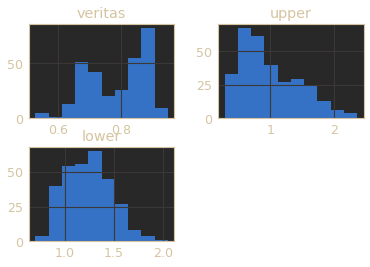

In [83]:
rff=pd.DataFrame(rff_,columns=['veritas','upper','lower'])
rff.hist()

In [84]:
rff.mean()

veritas    0.783220
upper      0.994348
lower      1.237378
dtype: float64

In [85]:
rff.std()

veritas    0.091776
upper      0.456836
lower      0.232179
dtype: float64

In [124]:
M2f=((rff.lower<1.01) & (rff.upper>1.3)).astype(int)
M1f=((rff.upper>1.3) & (rff.veritas>.71)).astype(int)

pd.set_option('display.max_rows', None)

DXf_=(rff.upper>1.3).astype(int)
xff=pd.DataFrame(DXf_).assign(dx=DX).assign(M=M1f+M2f)
xff[(xff.M==1) & (xff.dx==1)].index.size

37

In [122]:
(rff.upper>1.24).sum()

89

In [123]:
xff[(xff.dx==1) & (xff.M==1)]#.index.size

,upper,dx,M
5,1,1,1
14,1,1,1
18,1,1,1
20,1,1,1
23,1,1,1
32,1,1,1
36,0,1,1
39,1,1,1
46,1,1,1
57,1,1,1


In [109]:
rff

,veritas,upper,lower
0,0.761434,0.772963,1.429149
1,0.720557,1.346244,0.965412
2,0.743363,0.923606,1.320972
3,0.866667,0.473661,1.579849
4,0.871689,0.530608,1.655178
5,0.703026,1.529437,0.960466
6,0.900000,0.616588,1.340666
7,0.708333,0.751558,1.060103
8,0.692683,1.120621,1.115967
9,0.678436,1.647730,1.095964


In [62]:
xff[(xff.M==0) & (xff.dx==1)].index.size

44

In [72]:
rff[(rff.upper>1.3)].index.size

79

In [64]:
xff[(xff.dx==1) & (xff.M==1)]

,upper,dx,M
5,1,1,1
18,1,1,1
20,1,1,1
23,1,1,1
32,1,1,1
36,1,1,1
39,1,1,1
57,1,1,1
58,1,1,1
60,1,1,1


In [41]:
xff.M.sum()

15

In [44]:
rff

,veritas,upper,lower
0,0.723260,1.037726,1.424355
1,0.704433,0.968640,1.360777
2,0.743546,1.070235,1.424500
3,0.810964,0.567242,1.654887
4,0.867647,0.457731,1.866014
5,0.662701,1.593716,1.142657
6,0.905455,0.485714,1.940651
7,0.902174,0.442539,1.915609
8,0.647756,1.377953,1.181714
9,0.685512,1.809640,1.225446
